# Overview
The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [2]:
# Reading Train Data
import pandas as pd

In [73]:
train = pd.read_csv("train.csv")
features = train.drop(["PassengerId","Name","Ticket","Cabin","Survived"],axis=1)
target   = train["Survived"]

#### Clense and Preparing Train Data

In [23]:
target.fillna(target.mean(),inplace = True)
#Assume male value "0" and female "1" to train model with values 
features["Sex"][features["Sex"]=='male']=0
features["Sex"][features["Sex"]=='female']=1
#Assume C=0,S=1 and Q=2 
features["Embarked"][features["Embarked"]=='C']=0
features["Embarked"][features["Embarked"]=='S']=1
features["Embarked"][features["Embarked"]=='Q']=2
features.fillna(features.mean(),inplace=True)

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,0.0
2,3,1,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,3,0,35.0,0,0,8.0500,1.0


### Decesion Tree Model with GridSearch alogarithem

In [25]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.cross_validation import ShuffleSplit

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
        # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    
    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params , scoring=scoring_fnc , cv=cv_sets )

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

###### Training our model with training data

In [110]:
reg = fit_model(features, target)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print(reg.score(features, target))

Parameter 'max_depth' is 3 for the optimal model.
0.469455051325


###### Read , Clense and Preparing Test Data

In [55]:
test = pd.read_csv("test.csv")
test_features = test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
#Assume male value "0" and female "1" to train model with values 
test_features["Sex"][test_features["Sex"]=='male']=0
test_features["Sex"][test_features["Sex"]=='female']=1
#Assume C=0,S=1 and Q=2 
test_features["Embarked"][test_features["Embarked"]=='C']=0
test_features["Embarked"][test_features["Embarked"]=='S']=1
test_features["Embarked"][test_features["Embarked"]=='Q']=2
test_features.fillna(test_features.mean(),inplace=True)
test_features.head()

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


#### Predection of Survival's

In [109]:
Predicted=[]
for i, Survival in enumerate(reg.predict(test_features)):
    Predicted.append(Survival*100)
#print("Predicted Survial {}'s : {:,.2f}".format(i+1, Survial))
Survival = pd.Series(data=Predicted,index=[test["PassengerId"]])
Survival.to_csv("SurvivalPer1.csv")
Survival.head()

PassengerId
892    11.547344
893    58.974359
894    11.547344
895    11.547344
896    58.974359
dtype: float64

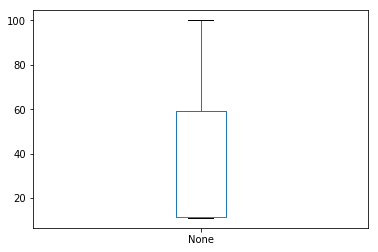

In [64]:
import matplotlib.pyplot as plt
Survival.plot(kind='box')
plt.show()

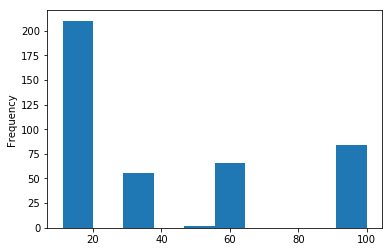

In [65]:
Survival.plot(kind='hist')
plt.show()

In [96]:
new_features = train.drop(["PassengerId","Name","Ticket","Cabin","Survived"],axis=1)
new_target   = train["Survived"]

###### Clense and Preparing train data with new varaibles

In [97]:
target.fillna(target.mean(),inplace = True)
#Assume male value "0" and female "1" to train model with values 
new_features["Sex"][new_features["Sex"]=='male']=0
new_features["Sex"][new_features["Sex"]=='female']=1
#Assume C=0,S=1 and Q=2 
new_features["Embarked"][new_features["Embarked"]=='C']=0
new_features["Embarked"][new_features["Embarked"]=='S']=1
new_features["Embarked"][new_features["Embarked"]=='Q']=2
new_features.head()

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,family_size
0,3,0,22.0,1,0,7.2500,1,0.0,2
1,1,1,38.0,1,0,71.2833,0,0.0,2
2,3,1,26.0,0,0,7.9250,1,0.0,1
3,1,1,35.0,1,0,53.1000,1,0.0,2
4,3,0,35.0,0,0,8.0500,1,0.0,1


#### Inclusion new best attributes


In [98]:
# Create the column Child and assign to 'NaN'
new_features["Child"] = float('NaN')
new_features["Child"][new_features["Age"]<18] = 1
# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
new_features["Child"][new_features["Age"] >= 18] = 0
new_features["family_size"] = new_features["SibSp"]+new_features["Parch"]+1
new_features.fillna(new_features.mean(),inplace=True)
new_features.head()

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,family_size
0,3,0,22.0,1,0,7.2500,1.0,0.0,2
1,1,1,38.0,1,0,71.2833,0.0,0.0,2
2,3,1,26.0,0,0,7.9250,1.0,0.0,1
3,1,1,35.0,1,0,53.1000,1.0,0.0,2
4,3,0,35.0,0,0,8.0500,1.0,0.0,1


##### Again Train Model 

In [111]:
reg = fit_model(new_features, target)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print(reg.score(new_features, target))

Parameter 'max_depth' is 3 for the optimal model.
0.469455051325


In [107]:
# Create the column Child and assign to 'NaN'
test_features["Child"] = float('NaN')
test_features["Child"][test_features["Age"]<18] = 1
# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
test_features["Child"][test_features["Age"] >= 18] = 0
test_features["family_size"] = test_features["SibSp"]+test_features["Parch"]+1
test_features.fillna(test_features.mean(),inplace=True)
Predicted_new=[]
#print(test_features)
for i, Survival_add in enumerate(reg.predict(test_features)):
    Predicted_new.append(Survival_add*100)
#print("Predicted Survial {}'s : {:,.2f}".format(i+1, Survial))
Survival_new = pd.Series(data=Predicted_new,index=[test["PassengerId"]])
Survival_new.to_csv("SurvivalPer_new.csv")
Survival_new.head()

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


PassengerId
892    11.547344
893    58.974359
894    11.547344
895    11.547344
896    58.974359
dtype: float64